#About the Dataset


This dataset is Breast Cancer dataset contains 569 instances with features derived from breast mass images. Each instance is labeled as **malignant** or **benign**, indicating the presence or absence of breast cancer. This dataset is commonly used for machine learning classification tasks and originates from the University of Wisconsin.

#Import the Dependencies

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn

#Load the Dataset

In [53]:
# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

###Split the data train and test

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [68]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
X_train.shape

(398, 30)

In [70]:
X_test.shape

(171, 30)

#Build the model

In [71]:
# Build the model
model = nn.Sequential( nn.Linear(D, 1),
                      nn.Sigmoid()
)

###Setup the Loss and Optimizer

In [72]:
# Select Loss and Optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

###Change data into pytorch tensor

In [73]:
# Convert data to PyTorch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

#Train the model

In [74]:
# Train Model
n_epochs = 1000

# stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradiente
  optimizer.zero_grad()

  # forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  # backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  #save_losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()

  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item(): 4f}, Test Loss: {loss_test.item(): 4f}')


Epoch 50/1000, Train Loss:  0.514404, Test Loss:  0.517002
Epoch 100/1000, Train Loss:  0.381074, Test Loss:  0.391360
Epoch 150/1000, Train Loss:  0.306269, Test Loss:  0.320145
Epoch 200/1000, Train Loss:  0.258248, Test Loss:  0.273919
Epoch 250/1000, Train Loss:  0.225091, Test Loss:  0.241110
Epoch 300/1000, Train Loss:  0.201078, Test Loss:  0.216550
Epoch 350/1000, Train Loss:  0.182986, Test Loss:  0.197569
Epoch 400/1000, Train Loss:  0.168886, Test Loss:  0.182540
Epoch 450/1000, Train Loss:  0.157584, Test Loss:  0.170392
Epoch 500/1000, Train Loss:  0.148311, Test Loss:  0.160392
Epoch 550/1000, Train Loss:  0.140550, Test Loss:  0.152034
Epoch 600/1000, Train Loss:  0.133946, Test Loss:  0.144955
Epoch 650/1000, Train Loss:  0.128246, Test Loss:  0.138892
Epoch 700/1000, Train Loss:  0.123266, Test Loss:  0.133647
Epoch 750/1000, Train Loss:  0.118869, Test Loss:  0.129069
Epoch 800/1000, Train Loss:  0.114950, Test Loss:  0.125043
Epoch 850/1000, Train Loss:  0.111430, Te

###Vitualize the train and test loss

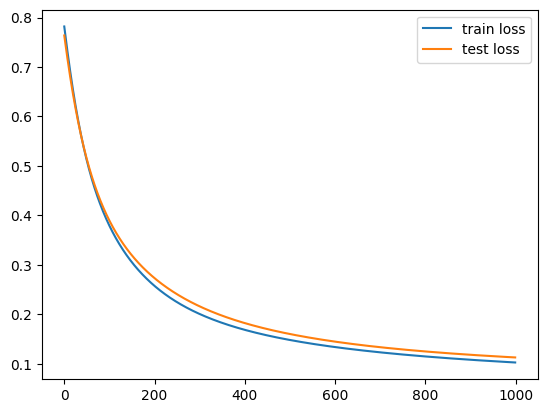

In [75]:
# plot the train and test loss
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()

#Test the Model Accuracy

In [85]:
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

print(f'Train acc: {train_acc: 4f}, Test acc: {test_acc: 4f}')


Train acc:  0.979899, Test acc:  0.976608


# Save the model

In [87]:
# State_dic
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2956, -0.2751, -0.3997, -0.3851, -0.1545, -0.0454, -0.3884, -0.4101,
                       -0.2655,  0.3889, -0.3377, -0.2618, -0.4726, -0.2836,  0.1415,  0.1805,
                        0.0769, -0.1768,  0.1839,  0.7231, -0.4670, -0.3021, -0.2834, -0.2939,
                       -0.3423, -0.2531, -0.3546, -0.3204, -0.3161, -0.3825]])),
             ('0.bias', tensor([0.2631]))])

In [89]:
# Save the model
torch.save(model.state_dict(), 'Breast-Cancer-Classification-model.pt')

#Download the model

In [90]:
# Download the model
from google.colab import files
files.download('/content/Breast-Cancer-Classification-model.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>